## Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных ##

Загрузите данные из файла global_power_plant_database.csv (https://drive.google.com/file/d/1S4TJpDqYwXzyIomrinpYHYbowWrdsAyv/view?usp=sharing). Рассчитайте среднее значение, моду, медиану, среднее квадратичное отклонение, смещенную и несмещенную дисперсию для capacity_mw и estimated_generation_gwh. Определите первый, второй и третий квартили. Визуализируйте данные с помощью гистограммы и boxplot (не забудьте про подписи к переменным и названия графиков).

Таблица содержит следующие поля:

country - страна расположения;

name - название электростанции;

capacity_mw - мощность электростанции в гигаваттах;

primary_fuel - используемый источник энергии;

latitude - географическая широта расположения электростанции в градусах; WGS84 (EPSG:4326);

longitude - географическая долгота расположения электростанции в градусах; WGS84 (EPSG:4326);

estimated_generation_gwh - прогнозируемая выработка электричества в гигаватт-часах в 2014 году.


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('global_power_plant_database.csv', delimiter=';')

In [7]:
df.head()

,country,name,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,NaN
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,NaN
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,NaN
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,NaN
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,NaN


In [57]:
df.dropna()

,country,name,capacity_mw,latitude,longitude,primary_fuel,estimated_generation_gwh
7,Albania,Bistrica 1,27.0,39.9116,20.1047,Hydro,89.132075
8,Albania,Fierza,500.0,42.2514,20.0431,Hydro,1650.593990
9,Albania,Koman,600.0,42.1033,19.8224,Hydro,1980.712788
10,Albania,Lanabregas,5.0,41.3428,19.8964,Hydro,16.505940
11,Albania,Shkopet,24.0,41.6796,19.8305,Hydro,79.228512
...,...,...,...,...,...,...,...
29905,Zambia,Ndola,50.0,-12.9667,28.6333,Oil,120.872642
29906,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,48.349057
29907,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,702.100000
29908,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,4397.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 7 columns):
country                     29910 non-null object
name                        29910 non-null object
capacity_mw                 29910 non-null float64
latitude                    29910 non-null float64
longitude                   29910 non-null float64
primary_fuel                29910 non-null object
estimated_generation_gwh    21791 non-null float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


In [60]:
df.describe()

,capacity_mw,latitude,longitude,estimated_generation_gwh
count,29910.000000,29910.000000,29910.000000,21791.000000
mean,186.294810,32.497558,-12.458680,847.036474
std,525.703572,23.654472,76.978265,4067.434967
min,1.000000,-77.847000,-179.977700,0.000000
25%,4.774430,28.863475,-79.211275,10.082961
50%,18.900000,40.071250,-3.746700,53.417041
75%,100.000000,47.134575,24.931050,339.874490
max,22500.000000,71.292000,179.388700,450562.692350


**Cреднее значение**

In [61]:
df['capacity_mw'].mean()

186.29480983808034

In [62]:
df['estimated_generation_gwh'].mean()

847.0364741420932

**Мода**

In [63]:
df['capacity_mw'].mode()

0    5.0
dtype: float64

In [64]:
df['estimated_generation_gwh'].mode()

0    149.985644
dtype: float64

**Медиана**

In [65]:
df['capacity_mw'].median()

18.9

In [66]:
df['estimated_generation_gwh'].median()

53.41704063227728

**Среднее квадратичное отклонение**

In [67]:
df['capacity_mw'].std(ddof=0)

525.6947836139199

In [68]:
df['estimated_generation_gwh'].std(ddof=0)

4067.3416374924386

**Смещенная дисперсия**

In [69]:
df['capacity_mw'].var(ddof=0)

276355.0055188861

In [70]:
df['estimated_generation_gwh'].var(ddof=0)

16543267.996079672

**Несмещенная дисперсия**

In [71]:
df['capacity_mw'].var(ddof=1)

276364.24537998205

In [72]:
df['estimated_generation_gwh'].var(ddof=1)

16544027.209847275

**Определите первый, второй и третий квартили**

In [73]:
np.percentile(df['capacity_mw'], [25, 50, 75])

array([  4.77443,  18.9    , 100.     ])

In [74]:
np.nanpercentile(df['estimated_generation_gwh'], [25, 50, 75])

array([ 10.0829609 ,  53.41704063, 339.87449006])

**Гистограммы**

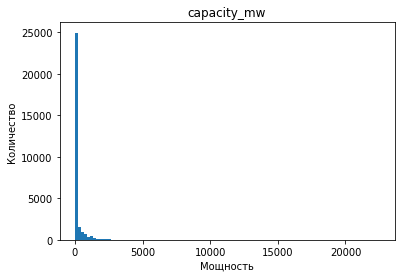

In [75]:
plt.hist(df['capacity_mw'], bins = 100)
plt.title('capacity_mw')
plt.xlabel('Мощность')
plt.ylabel('Количество')
plt.show()

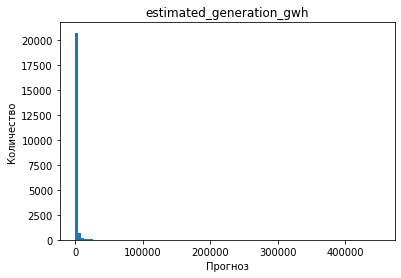

In [76]:
plt.hist(df['estimated_generation_gwh'], bins = 100)
plt.title('estimated_generation_gwh')
plt.xlabel('Прогноз')
plt.ylabel('Количество')
plt.show()

**boxplot**

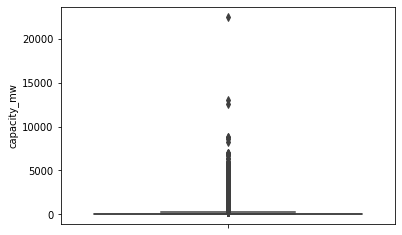

In [77]:
sns.boxplot(df['capacity_mw'], orient='v')
plt.show()

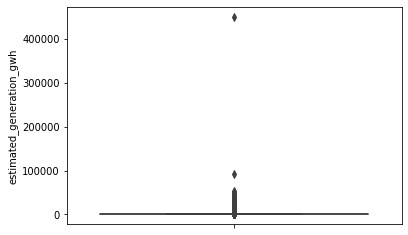

In [78]:
sns.boxplot(df['estimated_generation_gwh'], orient='v')
plt.show()